In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
#Processing the original data into Pandas dataframe. 

data = pd.read_csv('wdbc.dataset')

In [3]:
# Changing the diagnosis values to 0 and 1 from M and B so that they represent class(0) and class(1)

from sklearn.preprocessing import LabelEncoder
labelencoder_diagnosis = LabelEncoder()

#values for 'M' will be represented by '1' and 'B' will be represented by value '0'

data.iloc[:,1] = labelencoder_diagnosis.fit_transform(data.iloc[:,1].values)

In [4]:
#feature scaling the data using sklearn library

normalize = data.columns[2:]
scaler = preprocessing.MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:,2:])
scaled_data = pd.DataFrame(scaled_data, columns=normalize)

#replacing old data with the scaled data.

data.iloc[:,2:] = scaled_data 
print(data)

       842302  M     17.99     10.38     122.8      1001    0.1184    0.2776  \
0      842517  1  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768   
1    84300903  1  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017   
2    84348301  1  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361   
3    84358402  1  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893   
4      843786  1  0.258839  0.202570  0.267984  0.141506  0.678613  0.461996   
..        ... ..       ...       ...       ...       ...       ...       ...   
563    926424  1  0.690000  0.428813  0.678668  0.566490  0.526948  0.296055   
564    926682  1  0.622320  0.626987  0.604036  0.474019  0.407782  0.257714   
565    926954  1  0.455251  0.621238  0.445788  0.303118  0.288165  0.254340   
566    927241  1  0.644564  0.663510  0.665538  0.475716  0.588336  0.790197   
567     92751  0  0.036869  0.501522  0.028540  0.015907  0.000000  0.074351   

       0.3001    0.1471  ...     25.38 

In [5]:
#splitting dataset into 80% training and 20% testing sets choosing randomly
## splitting the data into independent x and target values y as well as transforming them to the array

from sklearn.model_selection import train_test_split

x = data.iloc[:,2:].values
y = data.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

print("x_train",x_train.shape)
print("x_test", x_test.shape)
print("y_train",y_train.shape)
print("y_test", y_test.shape)

x_train (454, 30)
x_test (114, 30)
y_train (454,)
y_test (114,)


In [6]:
#Training using scikit learn library
# def sgd_classifier(x_train,y_train):

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=200)
model.fit(x_train,y_train)        

SGDClassifier(max_iter=200)

In [7]:
#Evaluating the performance using cross validation using cross_val_score

from sklearn.model_selection import cross_val_score

print (cross_val_score(model,x_train,y_train, cv=4))

[0.99122807 0.95614035 0.95575221 0.98230088]


In [8]:
#Evaluating the performance using cross validation using cross_val_predict

from sklearn.model_selection import cross_val_predict

print(cross_val_predict(model, x_test, y_test, cv=4))

[0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 1]


In [9]:
#getting confusion matrix that would work on the predictions made by our model on the testing data and the real testing data

from sklearn.metrics import confusion_matrix
y_test_pred = model.predict(x_test) # calculating predictions of model on testing data
cm = confusion_matrix(y_test,y_test_pred) #confusion matrix


TP = cm[0][0] #true positive
TN = cm[1][1] #true negative
FN = cm[1][0] #false negative
FP = cm[0][1] #false positive

print ("confusion matrix", cm)
print ("Accuracy", ((TP + TN)/(TP + TN + FP + FN)))
print ("Precision", ((TP)/(TP + FP)))
print ("Recall", ((TP)/(TP + FN)))


confusion matrix [[69  2]
 [ 2 41]]
Accuracy 0.9649122807017544
Precision 0.971830985915493
Recall 0.971830985915493


In [10]:
# another method to calculate the accuracy, precision and recall 

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

print(classification_report(y_test, model.predict(x_test)))
print("Accuracy",accuracy_score(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy 0.9649122807017544


ROC CURVES

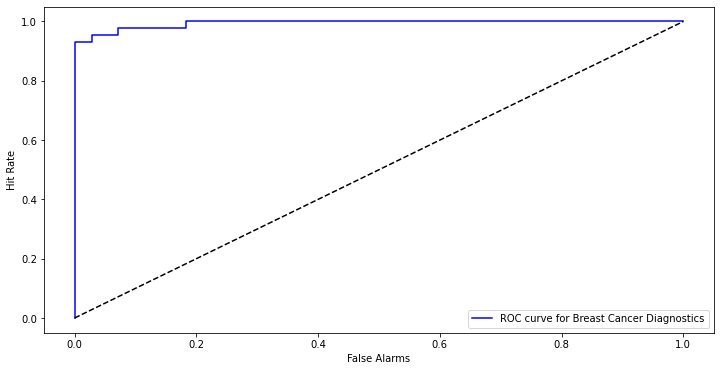

<ipython-input-11-576782d4c7ac>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.waitforbuttonpress()


In [ ]:
from sklearn.metrics import roc_curve

y_score = model.fit(x_train, y_train).decision_function(x_test) #getting predictions on test data

false_alarms, hit_rate, thresholds = roc_curve(y_test, y_score) #passing the predictions and original target values to ROC function

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(false_alarms, hit_rate, color='blue', label='ROC curve for Breast Cancer Diagnostics')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Alarms") #x-axis
plt.ylabel('Hit Rate') #y-axis
plt.legend(loc="lower right")
plt.show()
plt.waitforbuttonpress()